In [16]:
#Dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [17]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
path ="drive/My Drive/Data/Bitcoin Trust/"
dataset = pd.read_csv(path+'NNInput.csv', header = None)

In [19]:
#path ="drive/My Drive/Data/Digg/"
#dataset = pd.read_csv(path+'NNInput.txt',sep = '\t', header = None)
#dataset = dataset.astype(int)

In [20]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,4295,1384408151,1369000182,15407969,8,1925996.125,1.0,1,1,4055,1382211993,1365979550,16232443,3,5.410814e+06,1.333333,2,1,1001.0
1,1212,1308651719,1308651719,0,1,0.000,1.0,1,1,919,1307340714,1307340714,0,1,0.000000e+00,1.000000,1,1,1001.0
2,3999,1365845920,1365635155,210765,2,105382.500,1.0,1,1,360,1305289414,1304014701,1274713,2,6.373565e+05,3.500000,4,3,1001.0
3,1069,1307745449,1307745449,0,1,0.000,1.0,1,1,5086,1386028648,1385680042,348606,5,6.972120e+04,0.600000,10,-10,1001.0
4,4628,1375117913,1375117913,0,1,0.000,1.0,1,1,274,1377251265,1302847190,74404075,21,3.543051e+06,2.047619,5,1,1001.0


In [21]:
input_cols = len(dataset.columns) - 1
output_col = len(dataset.columns)
output_classes = len(set(dataset.iloc[:,-1]))

In [22]:
X = dataset.iloc[:,:input_cols].values
y = dataset.iloc[:,input_cols:output_col].values


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [24]:

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [26]:
#from sklearn.decomposition import PCA
#from sklearn.utils.extmath import randomized_svd

#pca = PCA(n_components = 500)

#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

#explained_variance = pca.explained_variance_ratio_

In [27]:
input_cols = X_train.shape[1]

In [28]:
#!pip install absl-py

In [29]:
#Dependencies
import keras
from keras.models import Sequential
from keras import regularizers
#from keras.layers.core import Dropout
from keras.layers import Dense
#Dropout(0.25),
#num_Rows * AbsolongE / input_cols
model = Sequential()
model.add(Dense(16, input_dim=input_cols , activation='relu',  kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(12, activation='relu',  kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(output_classes, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


In [31]:
from keras.callbacks import EarlyStopping

es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True)

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                304       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
 dense_5 (Dense)             (None, 76)                988       
                                                                 
Total params: 1496 (5.84 KB)
Trainable params: 1496 (5.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history = model.fit(X_train, y_train, epochs=50,  shuffle=True, validation_split=0.2)

Epoch 1/50
595/595 [==============================] - 2s 3ms/step - loss: 3.5516 - accuracy: 0.2478 - val_loss: 2.0209 - val_accuracy: 0.4590
Epoch 2/50
595/595 [==============================] - 2s 3ms/step - loss: 1.8234 - accuracy: 0.5583 - val_loss: 1.7167 - val_accuracy: 0.5890
Epoch 3/50
595/595 [==============================] - 2s 3ms/step - loss: 1.6408 - accuracy: 0.6320 - val_loss: 1.6018 - val_accuracy: 0.6540
Epoch 4/50
595/595 [==============================] - 1s 2ms/step - loss: 1.5519 - accuracy: 0.6620 - val_loss: 1.5307 - val_accuracy: 0.7154
Epoch 5/50
595/595 [==============================] - 1s 2ms/step - loss: 1.4909 - accuracy: 0.6891 - val_loss: 1.4832 - val_accuracy: 0.6895
Epoch 6/50
595/595 [==============================] - 1s 2ms/step - loss: 1.4427 - accuracy: 0.6978 - val_loss: 1.4343 - val_accuracy: 0.6973
Epoch 7/50
595/595 [==============================] - 1s 2ms/step - loss: 1.4032 - accuracy: 0.7152 - val_loss: 1.4043 - val_accuracy: 0.7240
Epoch 

In [34]:

#y_pred = ridgereg.predict(X_test)
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

83/83 [==============================] - 0s 1ms/step


In [35]:
from sklearn.metrics import accuracy_score

a = accuracy_score(pred,test)
print('Accuracy is:', a)

Accuracy is: 0.8818629307080651


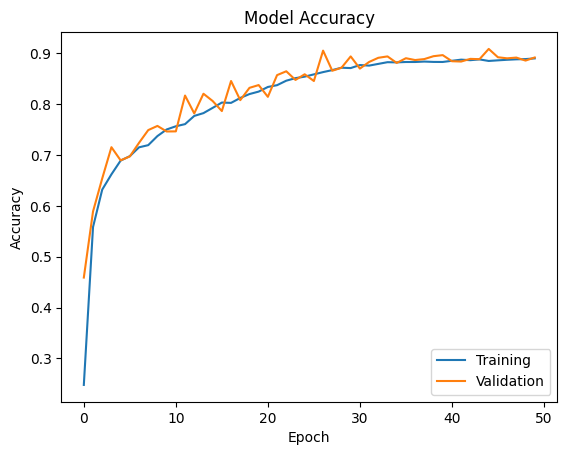

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

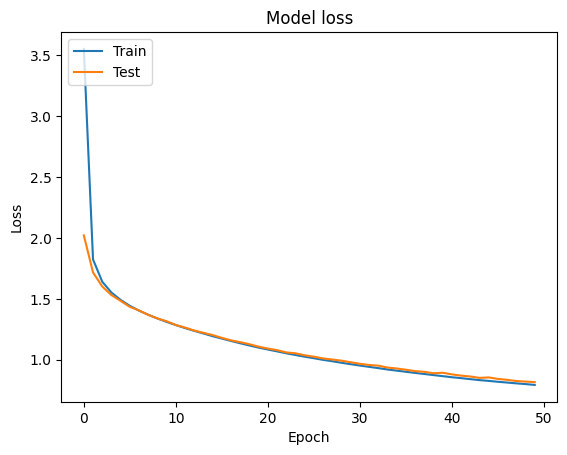

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


matrix = confusion_matrix(test, pred)
matrix

array([[277,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  1, 280,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0, 275,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0, 258,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,  70, 239,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   1, 280,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
    

In [39]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       284
           1       0.97      0.96      0.97       292
           2       0.94      1.00      0.97       275
           3       0.78      0.95      0.86       273
           4       0.90      0.77      0.83       309
           5       0.98      1.00      0.99       281
           6       0.67      0.96      0.79       301
           7       0.88      0.53      0.66       306
           8       0.99      1.00      0.99       270
           9       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         4
          18       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

In [41]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}

    for per_class in unique_class:
        #creating a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [42]:
lr_roc_auc_multiclass = roc_auc_score_multiclass(test, pred)
print(lr_roc_auc_multiclass)

{0: 0.986615385994371, 1: 0.9777492025169555, 2: 0.996407438715131, 3: 0.9573247698247698, 4: 0.8809423692873043, 5: 0.9967375897219373, 6: 0.9490835391998182, 7: 0.7583609746539587, 8: 0.9991564740615774, 9: 0.49943117178612056, 11: 0.5, 12: 0.5, 13: 0.5, 14: 0.5, 15: 0.5, 16: 0.5, 17: 0.5, 18: 0.49962121212121213, 20: 0.5, 21: 0.5, 23: 0.5, 24: 0.5, 25: 0.5, 26: 0.5, 27: 0.5, 35: 0.5, 45: 0.5, 62: 0.5, 75: 0.5}
